<a href="https://colab.research.google.com/github/leeyangkyoo/Android-Bridge-App/blob/master/4_10_%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%B6%84%EC%84%9D_RNN_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%EB%B9%84%EA%B5%90%20%EC%96%91%EA%B7%9C%20%EC%88%98%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.10 시계열 분석 RNN 알고리즘 비교
모델
* 다층퍼셉트론 모델
* 순환신경망 모델
* 상태유지 순환신경망 모델
* 상태유지 스택 순환신경망 모델

To learn
* MinMaxScaler
* reshape


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
dataset = pd.read_csv("./sample01.csv", delimiter=",")

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262144 entries, 0 to 262143
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    262144 non-null  float64
 1   Vol     262144 non-null  float64
dtypes: float64(2)
memory usage: 4.0 MB


In [7]:
dataset.describe()

,Time,Vol
count,2.621440e+05,262144.000000
mean,2.184525e+06,0.103507
std,1.261243e+06,0.105381
min,0.000000e+00,-0.004310
25%,1.092263e+06,0.002517
50%,2.184525e+06,0.003552
75%,3.276787e+06,0.212313
max,4.369050e+06,0.219347


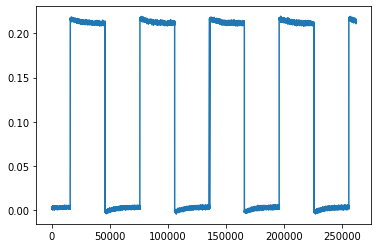

In [8]:
dataset['Vol'].plot()

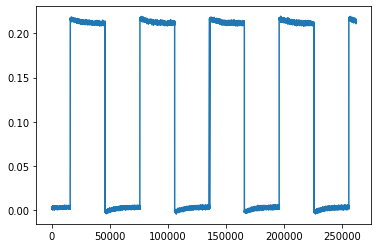

In [19]:
#signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

plot_x = np.arange(1600)
plot_y = signal_data
#plt.plot(plot_x, plot_y)
plt.plot(signal_data)
plt.show()

In [18]:
#dataset['Vol']
signal_data = dataset['Vol']
signal_data

0         0.002724
1         0.002724
2         0.002724
3         0.002724
4         0.001897
            ...   
262139    0.214795
262140    0.214795
262141    0.214382
262142    0.214382
262143    0.214382
Name: Vol, Length: 262144, dtype: float64

In [ ]:
signal_data = dataset['Vol']

plot_x = np.arange(262143)
plot_y = signal_data
plt.plot(plot_x, plot_y)
plt.show()

In [25]:
signal_data



0         0.002724
1         0.002724
2         0.002724
3         0.002724
4         0.001897
            ...   
262139    0.214795
262140    0.214795
262141    0.214382
262142    0.214382
262143    0.214382
Name: Vol, Length: 262144, dtype: float64

In [21]:
plot_x

array([   0,    1,    2, ..., 1597, 1598, 1599])

In [22]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [23]:
from sklearn.preprocessing import MinMaxScaler

look_back = 40 # window

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_train = np.squeeze(x_train)
x_val = np.squeeze(x_val)
x_test = np.squeeze(x_test)


ValueError: ignored

In [20]:
x_train[0]

array([1.        , 0.99901336, 0.99605735, 0.99114363, 0.98429158,
       0.97552826, 0.96488824, 0.95241353, 0.93815334, 0.92216396,
       0.9045085 , 0.88525662, 0.86448431, 0.84227355, 0.81871199,
       0.79389263, 0.7679134 , 0.74087684, 0.71288965, 0.68406228,
       0.6545085 , 0.62434494, 0.59369066, 0.56266662, 0.53139526,
       0.5       , 0.46860474, 0.43733338, 0.40630934, 0.37565506,
       0.3454915 , 0.31593772, 0.28711035, 0.25912316, 0.2320866 ,
       0.20610737, 0.18128801, 0.15772645, 0.13551569, 0.11474338])

In [21]:
x_train.shape

(760, 40)

In [12]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32,input_dim=40,activation="relu"),
  tf.keras.layers.Dropout(0.1),
#   tf.keras.layers.Dense(32, activation='relu'),
#   tf.keras.layers.Dropout(0.3),
#   tf.keras.layers.Dense(32, activation='relu'),
#   tf.keras.layers.Dropout(0.3), 
#   tf.keras.layers.Dense(32, activation='relu'),
#   tf.keras.layers.Dropout(0.3),     
  tf.keras.layers.Dense(1)
])


In [22]:
# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adagrad')

# 4. 모델 학습시키기
#hist = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

hist = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
24/24 [==============================] - 0s 5ms/step - loss: 0.0204 - val_loss: 0.0037
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0192 - val_loss: 0.0037
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0203 - val_loss: 0.0035
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0190 - val_loss: 0.0034
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0214 - val_loss: 0.0033
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0203 - val_loss: 0.0034
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0213 - val_loss: 0.0032
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0217 - val_loss: 0.0031
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0165 - val_loss: 0.0031
Epoch 10/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0030
Epoch 11/20
24/24 [

In [23]:
# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: ', testScore)


Train Score:  0.0025724079459905624
Validataion Score:  0.0026469018775969744
Test Score:  0.0026469018775969744


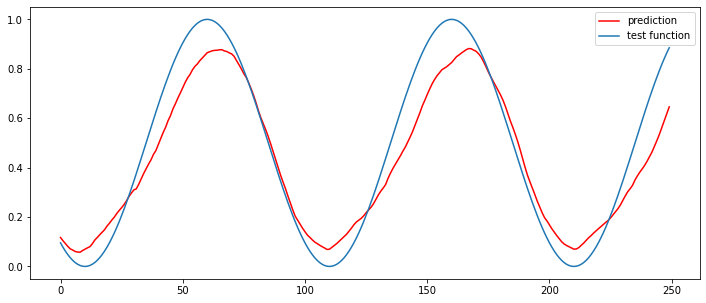

In [24]:
# 7. 모델 사용하기
look_ahead = 250
xhat = x_test[0, None]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(xhat, batch_size=32)
    predictions[i] = prediction
    xhat = np.hstack([xhat[:,1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()

# 순환신경망 모델

In [25]:
# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [26]:
x_train.shape

(760, 40, 1)

In [27]:
x_train[0]

array([[1.        ],
       [0.99901336],
       [0.99605735],
       [0.99114363],
       [0.98429158],
       [0.97552826],
       [0.96488824],
       [0.95241353],
       [0.93815334],
       [0.92216396],
       [0.9045085 ],
       [0.88525662],
       [0.86448431],
       [0.84227355],
       [0.81871199],
       [0.79389263],
       [0.7679134 ],
       [0.74087684],
       [0.71288965],
       [0.68406228],
       [0.6545085 ],
       [0.62434494],
       [0.59369066],
       [0.56266662],
       [0.53139526],
       [0.5       ],
       [0.46860474],
       [0.43733338],
       [0.40630934],
       [0.37565506],
       [0.3454915 ],
       [0.31593772],
       [0.28711035],
       [0.25912316],
       [0.2320866 ],
       [0.20610737],
       [0.18128801],
       [0.15772645],
       [0.13551569],
       [0.11474338]])

In [28]:


model2 = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(32,input_shape=(None,1)),
  tf.keras.layers.Dropout(0.3),   
  tf.keras.layers.Dense(1)
])

In [29]:
model2.compile(loss='mean_squared_error', optimizer='adam')
hist = model2.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0786 - val_loss: 0.0222
Epoch 2/200
24/24 [==============================] - 0s 5ms/step - loss: 0.0296 - val_loss: 0.0151
Epoch 3/200
24/24 [==============================] - 0s 5ms/step - loss: 0.0215 - val_loss: 0.0102
Epoch 4/200
24/24 [==============================] - 0s 5ms/step - loss: 0.0158 - val_loss: 0.0029
Epoch 5/200
24/24 [==============================] - 0s 5ms/step - loss: 0.0092 - val_loss: 3.9648e-04
Epoch 6/200
24/24 [==============================] - 0s 5ms/step - loss: 0.0074 - val_loss: 7.8131e-04
Epoch 7/200
24/24 [==============================] - 0s 5ms/step - loss: 0.0064 - val_loss: 3.1674e-04
Epoch 8/200
24/24 [==============================] - 0s 5ms/step - loss: 0.0067 - val_loss: 4.4957e-04
Epoch 9/200
24/24 [==============================] - 0s 5ms/step - loss: 0.0061 - val_loss: 2.6139e-04
Epoch 10/200
24/24 [==============================] - 0s 5ms/step - loss: 0.0060 - val_l

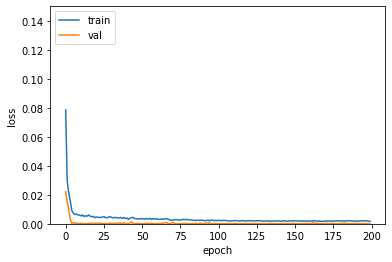

Train Score:  0.00010346267663408071
Validataion Score:  0.00010008394747273996
Test Score:  0.00010008394747273996


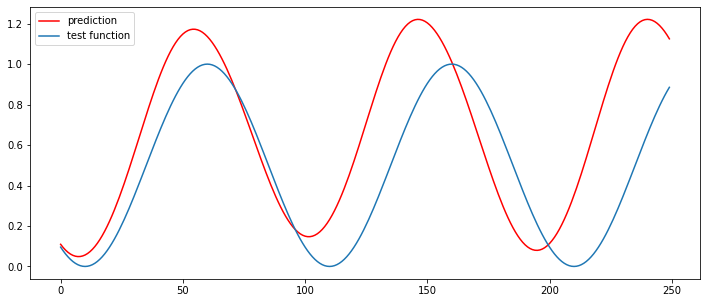

In [30]:
# 5. 학습과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 6. 모델 평가하기
trainScore = model2.evaluate(x_train, y_train, verbose=0)
model2.reset_states()
print('Train Score: ', trainScore)
valScore = model2.evaluate(x_val, y_val, verbose=0)
model2.reset_states()
print('Validataion Score: ', valScore)
testScore = model2.evaluate(x_test, y_test, verbose=0)
model2.reset_states()
print('Test Score: ', testScore)

# 7. 모델 사용하기
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model2.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()

In [31]:
predictions[0]

array([0.10943863])

# 상태유지 순환신경망 모델


In [32]:
class CustomHistory(tf.keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

In [33]:

model3 = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True),
  tf.keras.layers.Dropout(0.3),   
  tf.keras.layers.Dense(1)
])

model3.compile(loss='mean_squared_error', optimizer='adam')

In [34]:
# 4. 모델 학습시키기
custom_hist = CustomHistory()
custom_hist.init()


In [35]:
for i in range(200):
    model3.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, callbacks=[custom_hist], validation_data=(x_val, y_val))
    model3.reset_states()


760/760 [==============================] - 3s 4ms/step - loss: 0.0019 - val_loss: 3.2240e-05


In [ ]:
# 5. 학습과정 살펴보기
plt.plot(custom_hist.train_loss)
plt.plot(custom_hist.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# 6. 모델 평가하기
trainScore = model3.evaluate(x_train, y_train, batch_size=1, verbose=0)
model3.reset_states()
print('Train Score: ', trainScore)
valScore = model3.evaluate(x_val, y_val, batch_size=1, verbose=0)
model3.reset_states()
print('Validataion Score: ', valScore)
testScore = model3.evaluate(x_test, y_test, batch_size=1, verbose=0)
model3.reset_states()
print('Test Score: ', testScore)

In [ ]:
# 7. 모델 사용하기
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()